**ESERCIZITAZIONE 2:**

Il problema richiede la soluzione numerica dell'integrale $I = \int_0^1 dx \frac{\pi}{2} cos(\frac{\pi}{2} x )$, campionando $K$ punti nel range di integrazione con un metodo di importance sampling. E' richiesto uno studio statistico di $I$ attraverso il data-blocking: bisogna calcolare la media $<I>$ su un blocco di dimensione $N$, per poi calcolare la media globale, con associata la deviazione standard della media dopo $M$ blocchi. 

**Esercizio 2.1:** Si risolve numericamente l'integrale sull'intervallo $[0,1]$ della funzione $y = \frac{\pi}{2} cos(\frac{\pi}{2} x )$, usando dapprima il metodo della media con un campionamento di $100$ punti, estratti con distribuzione uniforme su tale range:

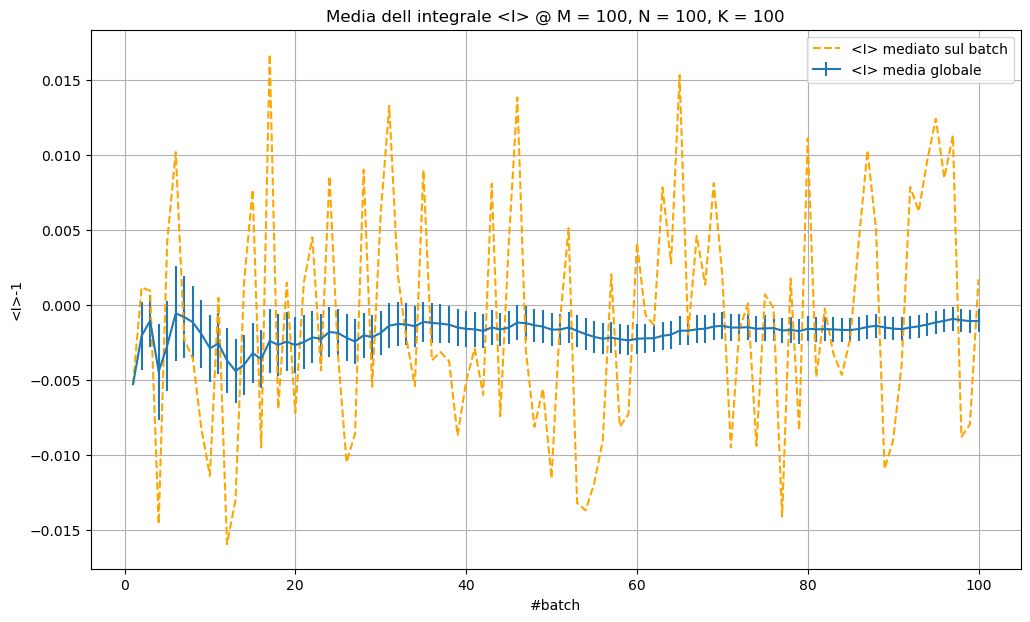

In [1]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_2.1/Integrale_metodo_media.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2,3) , names = ('Blk','Current', 'Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Blk'] = pd.to_numeric(MED['Blk'] , errors = 'coerce')
MED['Current'] = pd.to_numeric(MED['Current'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Blk_vector = MED['Blk']
Current_vector = MED['Current']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,7))
plt.title('Media dell integrale <I> @ M = 100, N = 100, K = 100')
plt.errorbar(Blk_vector, Media_vector - 1, yerr = Stdev_Media_vector, label = '<I> media globale')
plt.plot(Blk_vector, Current_vector - 1, label = '<I> mediato sul batch', color = 'orange', linestyle = '--')
plt.xlabel('#batch')
plt.ylabel('<I>-1')
plt.legend()
plt.grid(True)
plt.show()

Si osserva come, nonostante il numero elevato di punti utilizzati per l'integrazione, la media di $<I>$ presenti dei valori che fluttuano fino a oltre l'$1 \% $ del valor medio, indice della scarsa robustezza di questo metodo di integrazione numerica. Come conseguenza, per far convergere la media globale verso il valore atteso entro una deviazione standard della media servirebbe un numero notevole di batch.

Si effettua la stessa integrazione usando come peso statistico la parabola $ d(x) = \frac{\pi}{2} - \frac{\pi}{2} x^2$, riconducendo quindi il problema al calcolo della sommatoria $\frac{1}{N} \sum \frac{p(x_i)}{d(x_i)}$ campionata $20$ punti $x_i$ generati con la distribuzione $d$. Per effettuare quest'ultimo campionamento, si usa il metodo della rejection, campionando coordinate $(x_i,y_i)$ pseudocasuali sull'intervallo $[0,1]$, con distribuzione uniforme per l'ascissa e secondo la maggiorante $g(x)$ per l'ordinata, accettando il numero $x_i$ solamente se $y_i < d(x_i) / g(x_i)$. In questo caso si è scelti $g(x) = \frac{\pi}{2} \frac{1}{1 + x^2}$ (ovvero una maggiorante di Cauchy-Lorentz). Si è scelto di impiegare una maggiorante $g(x)$ per evitare un'elevata percentuale di punti rigettati, situazione che renderebbe l'algoritmo inefficiente.



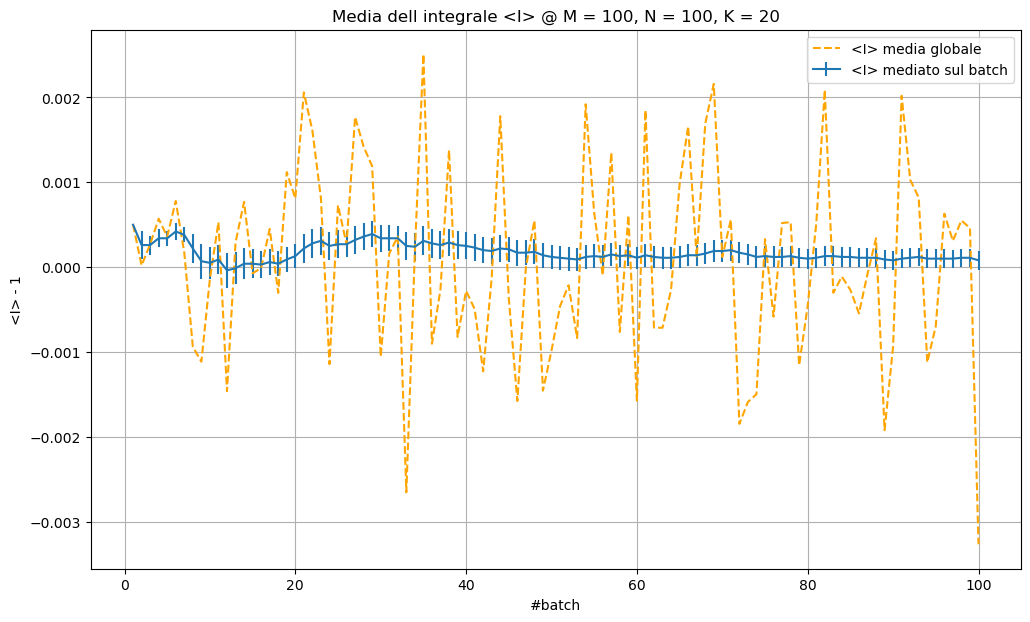

In [2]:
#Lettura file
filename = "Codici_finali/Esercizio_2.1/Integrale_importance_sampling.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2,3) , names = ('Blk','Current','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Blk'] = pd.to_numeric(MED['Blk'] , errors = 'coerce')
MED['Current'] = pd.to_numeric(MED['Current'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Blk_vector = MED['Blk']
Current_vector = MED['Current']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,7))
plt.title('Media dell integrale <I> @ M = 100, N = 100, K = 20')
plt.errorbar(Blk_vector, Media_vector - 1, yerr = Stdev_Media_vector, label = '<I> mediato sul batch')
plt.plot(Blk_vector, Current_vector - 1, color = 'orange', linestyle = '--', label = '<I> media globale')
plt.xlabel('#batch')
plt.ylabel('<I> - 1')
plt.grid(True)
plt.legend()
plt.show()

Confrontando i due grafici dell'andamento di $<I>$ in funzione del numero di batch si osserva che, nel caso dell'importance sampling, si ottengono fluttuazioni della media di blocco e della deviazione standard della media con ampiezza almeno 5 volte più piccola rispetto al caso del metodo della media. Questo miglioramento è stato riscontrato pur avendo ridotto il numero di punti impiegati per ogni integrazione a $K = 20$. Dunque, il metodo dell'importance sampling si rivela essere molto più preciso rispetto al metodo della media pur utilizzando un numero di punti $5$ volte più piccolo per effettuare ciascuna integrazione.

Questa proprietà rende l'importance sampling particolarmente performante nell'effettuazione di integrazioni su domini in $d > 1$ dimensioni, permettendo di ottenere risultati affidabili pur evitando di usare un numero troppo elevato di punti per ciascuna dimensione, che incrementerebbe il costo computazionale.

**Esercizio 2.2:** Si simula un random walk, che consiste in un processo Markov in cui si costruisce una successione di posizioni nello spazio 3D in cui, ad ogni iterazione, la posizione successiva è collocata a distanza fissata $a$ da quella precedente, con direzione casuale. 

Il primo esperimento prevede un Random Walk discreto, in cui ogni step viene effettuato, con passo $a$, in una delle tre direzioni cartesiane $X$ , $Y$ , $Z$, con verso arbitrario. La mossa è estratta dalle 6 possibilità con una distribuzione uniforme.

La statistica del processo è, come di consueto, analizzata con il metodo del data-blocking, per cui la gerarchia del Random Walk è la sequente:

1. Si completa un singolo Random Walk con un numero $K$ di passi, calcolando poi il raggio quadratico medio $r$, corrispondente alla quadratura delle tre coordinate finali $(X,Y,Z)$.

2. Si ripete $N$ volte il Random Walk, completando così un blocco. Si calcola quindi $<r>$, vale a dire il raggio mediato sulle $N$ esecuzioni del batch.

3. Si ripetono $M$ blocchi, calcolando alla fine di ciascuno di essi la media globale di $<r>$ fino al batch corrente, associando a tale stima la sua incertezza, calcolata come deviazione standard della media.

Al fine di riportare un esempio, si raffigura l'andamento della media globale di $<r>$ all'aumentare del numero di batch, scegliendo $50$ passi per ogni Random Walk:

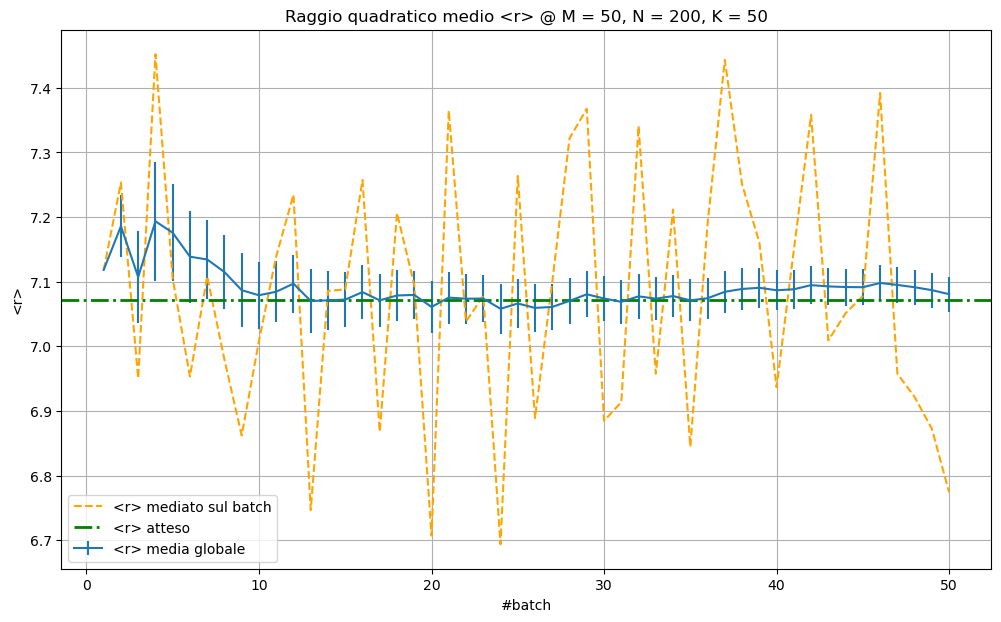

In [3]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

#Lettura file
filename = "Codici_finali/Esercizio_2.2/RandomWalk_discrete.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Current', 'Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Current'] = pd.to_numeric(MED['Current'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Current_vector = MED['Current']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 50;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,7))
plt.title('Raggio quadratico medio <r> @ M = 50, N = 200, K = 50')
plt.errorbar(N_vector, Media_vector , yerr = Stdev_Media_vector, label = '<r> media globale')
plt.plot(N_vector, Current_vector , label = '<r> mediato sul batch', color = 'orange', linestyle = '--')
plt.axhline(y=mt.sqrt(50), color='green', linestyle='-.', linewidth=2, label = '<r> atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

Si osserva un'importante fluttuazione della media di blocco attorno alla media globale, pur avendo imposto un numero di esecuzioni per ogni blocco pari a $N = 200$, a confermare la necessità del data-blocking.

Inoltre, nel grafico è riportata la retta orizzontale corrispondente alla radice del numero di step $K$, che corrisponde il valore atteso del raggio quadratico medio. Infatti, dal teorema del limite centrale, è possibile dimostrare che tale quantità evolve come la radice quadrata del numero di step nel Random Walk.

Per avere conferma di questo fatto, si è riportato il grafico che rappresenta, in funzione del $K$ scelto, il valore della media globale di $<r>$ dopo 50 blocchi, con relativa incertezza.

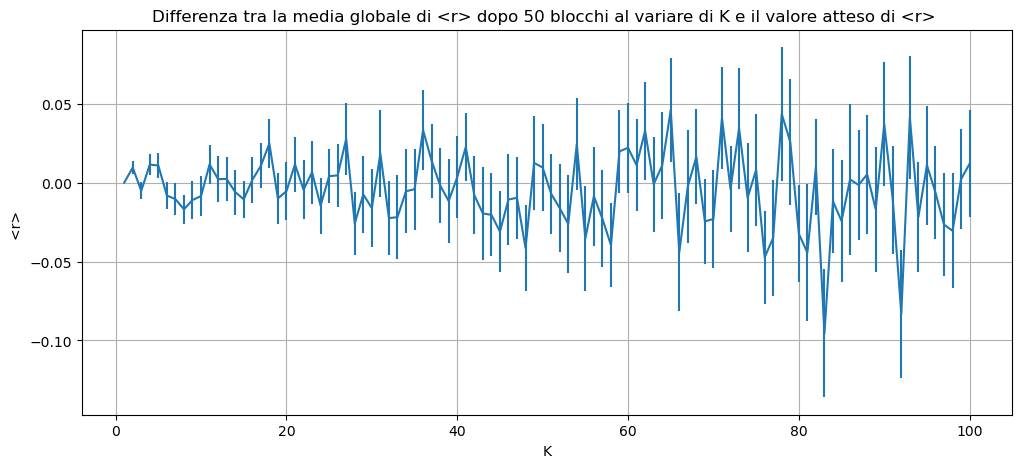

In [4]:
#Lettura file
filename = "Codici_finali/Esercizio_2.2/RandomWalk_discrete_steps.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Step','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Step'] = pd.to_numeric(MED['Step'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Nsteps_vector = MED['Step']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 100;
N_vector = np.zeros(N)
N_squares = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;
    N_squares[i] = mt.sqrt(i+1)

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,5))
plt.title('Differenza tra la media globale di <r> dopo 50 blocchi al variare di K e il valore atteso di <r> ')
plt.errorbar(N_vector, Media_vector - N_squares, yerr = Stdev_Media_vector, label = '<r> media globale dopo 50 batch')
#plt.plot(N_vector, N_squares, label = '<r> atteso')
#plt.legend()
plt.xlabel('K')
plt.ylabel('<r> ')
plt.grid(True)
plt.show()

Per semplificare la rappresentazione, il valore atteso di $<r> = \sqrt{K}$ è stato sottratto dalla media globale di $<r>$. Si osserva un generale accordo tra le due relazioni.

Si ripete l'esperimento con un Random Walk nello spazio 3D nel continuo. Più precisamente, si permette ad ogni nuovo passo di campionare una posizione sulla superficie sferica di raggio $a = 1$ centrata nella posizione precedente. Si deve fare in modo di campionare uniformemente l'angolo solido $d\Omega = cos\theta d\theta d\phi$, in modo tale che la probabilità di estrarre la direzione della mossa sia uniformemente distribuita sulla calotta sferica. Pertanto si campiona l'angolo polare $\theta$ con la distribuzione $p(\theta) = 1/2 \ sin\theta$ e l'angolo azimutale $\phi$ semplicemente in maniera unforme ($p(\phi) = 1$).

Dunque, si ripropone lo studio statistico effettuato nel caso precedente:

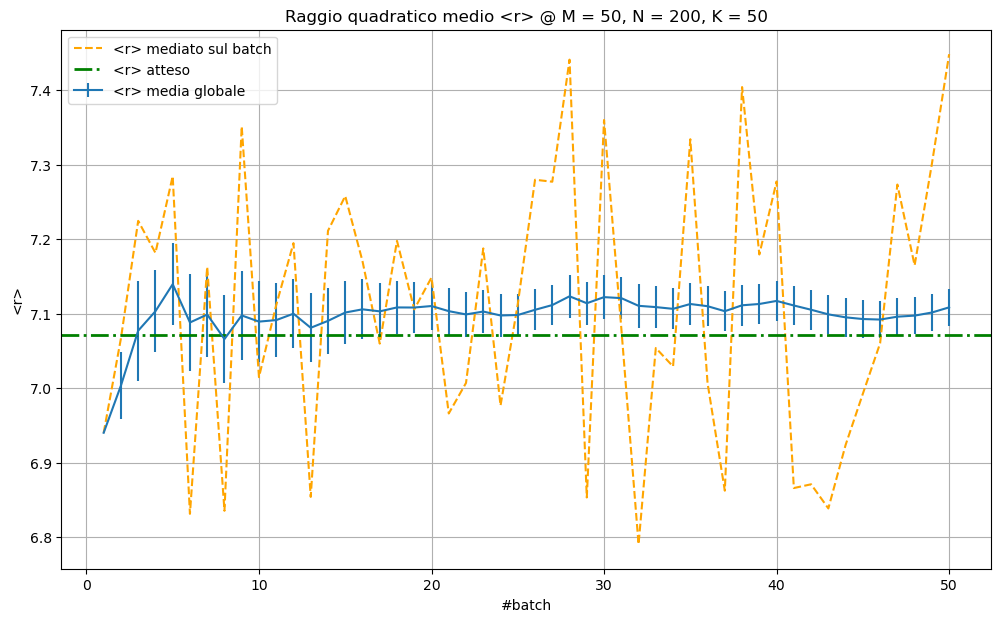

In [5]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

#Lettura file
filename = "Codici_finali/Esercizio_2.2/RandomWalk_continuum.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Current', 'Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Current'] = pd.to_numeric(MED['Current'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Current_vector = MED['Current']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 50;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,7))
plt.title('Raggio quadratico medio <r> @ M = 50, N = 200, K = 50')
plt.errorbar(N_vector, Media_vector , yerr = Stdev_Media_vector, label = '<r> media globale')
plt.plot(N_vector, Current_vector , label = '<r> mediato sul batch', color = 'orange', linestyle = '--')
plt.axhline(y=mt.sqrt(50), color='green', linestyle='-.', linewidth=2, label = '<r> atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.legend()
plt.grid(True)
plt.show()

Si osserva un minore accordo tra la media globale di $<r>$ e il suo valore atteso.

Passando al grafico che mostra la media globale di $r$ dopo $50$ blocchi, al variare del numero di step $K$:

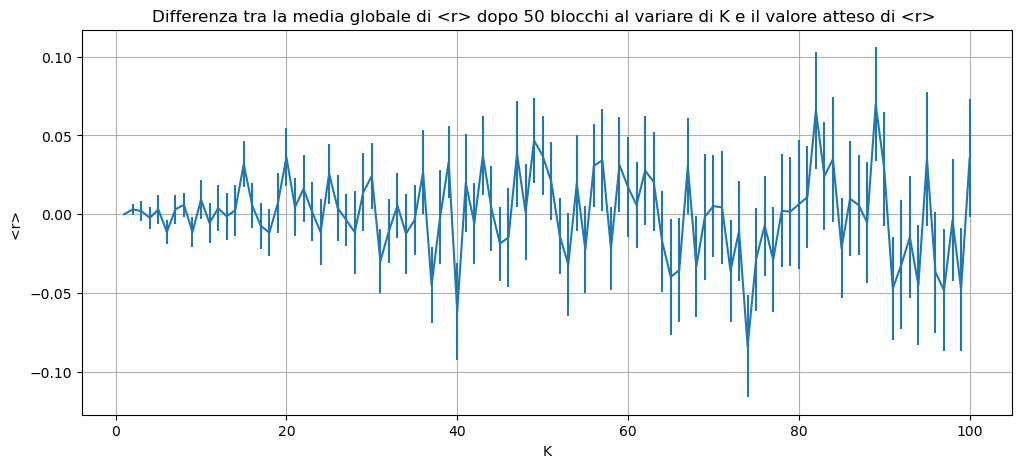

In [6]:
#Lettura file
filename = "Codici_finali/Esercizio_2.2/RandomWalk_continuum_steps.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Step','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Step'] = pd.to_numeric(MED['Step'] , errors = 'coerce')
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Nsteps_vector = MED['Step']
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 100;
N_vector = np.zeros(N)
N_squares = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;
    N_squares[i] = mt.sqrt(i+1)

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,5))
plt.title('Differenza tra la media globale di <r> dopo 50 blocchi al variare di K e il valore atteso di <r> ')
plt.errorbar(N_vector, Media_vector - N_squares, yerr = Stdev_Media_vector, label = '<r> media globale dopo 50 batch')
#plt.plot(N_vector, N_squares, label = '<r> atteso')
#plt.legend()
plt.xlabel('K')
plt.ylabel('<r> ')
plt.grid(True)
plt.show()

Il risultato è coerente con quello del caso di un Random Walk con direzioni cartesiane.